In [1]:
print("Hi")

Hi


In [2]:
import pandas as pd
import numpy as np
import joblib
import os

In [3]:
df_csv = pd.read_csv('app/src/model/adm_data.csv')
print(df_csv.head())

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


In [4]:
# Removing unnecessary columns: 'Serial No.', 'University Rating', and 'Research'.
# These columns are not useful for the analysis and model, so we drop them to clean the dataset.
df_csv.drop(columns=['Serial No.', 'University Rating', 'Research'], inplace=True)

# Display the updated dataset to confirm the columns have been removed
df_csv.head()

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Chance of Admit
0,337,118,4.5,4.5,9.65,0.92
1,324,107,4.0,4.5,8.87,0.76
2,316,104,3.0,3.5,8.00,0.72
3,322,110,3.5,2.5,8.67,0.80
4,314,103,2.0,3.0,8.21,0.65


In [ ]:
%pip install distutils

ModuleNotFoundError: No module named 'distutils'

In [21]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Extract features and target variable
X = df_csv.drop(columns=['Chance of Admit '])
y = df_csv['Chance of Admit ']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data to fit the CNN input requirements
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.MaxPooling1D(pool_size=1),
    tf.keras.layers.Conv1D(128, kernel_size=2, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=1),
    tf.keras.layers.Conv1D(256, kernel_size=2, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_absolute_error'])

# Define early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Mean Absolute Error: {mae}")

c:\Users\ngand\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - loss: 0.4281 - mean_absolute_error: 0.6091 - val_loss: 0.0537 - val_mean_absolute_error: 0.1948
Epoch 2/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1299 - mean_absolute_error: 0.2852 - val_loss: 0.0401 - val_mean_absolute_error: 0.1682
Epoch 3/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0889 - mean_absolute_error: 0.2496 - val_loss: 0.0209 - val_mean_absolute_error: 0.1192
Epoch 4/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0594 - mean_absolute_error: 0.1930 - val_loss: 0.0244 - val_mean_absolute_error: 0.1442
Epoch 5/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0465 - mean_absolute_error: 0.1746 - val_loss: 0.0080 - val_mean_absolute_error: 0.0717
Epoch 6/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0468 - mean_absolute_error: 0.1751 - val_loss: 0.0083 - val_mean_absolute_error: 0.0782
Epoch 7/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0429 - mean_absolute_error: 0.1669 - v

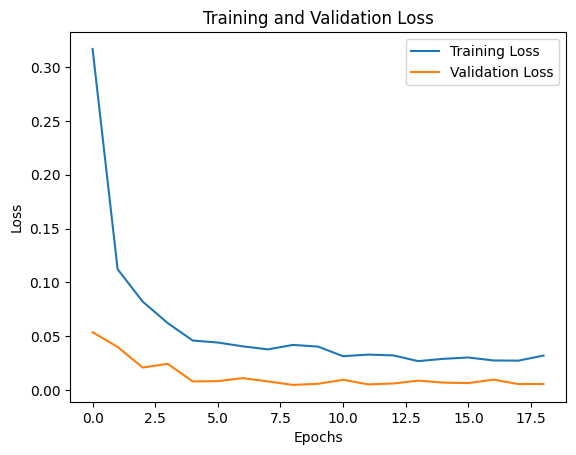

In [22]:

import matplotlib.pyplot as plt

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [25]:
def predict_chance_of_admission(gre_score, toefl_score, sop, lor, cgpa):
    """
    Predicts the chance of admission based on the provided academic scores.

    Parameters:
      - gre_score (float): GRE score of the applicant.
      - toefl_score (float): TOEFL score of the applicant.
      - sop (float): Strength of Statement of Purpose (SOP) on a scale of 1 to 5.
      - lor (float): Strength of Letter of Recommendation (LOR) on a scale of 1 to 5.
      - cgpa (float): Undergraduate CGPA of the applicant on a scale of 10.
    
    Returns:
      - float: Predicted chance of admission as a percentage.
    """
    # Create a DataFrame with the input values
    input_data = pd.DataFrame({
        'GRE Score': [gre_score],
        'TOEFL Score': [toefl_score],
        'SOP': [sop],
        'LOR ': [lor],  # Note the trailing space in 'LOR '
        'CGPA': [cgpa]
    })

    # Apply the same preprocessing as training data
    scaled_data = scaler.transform(input_data)
    reshaped_data = scaled_data.reshape(scaled_data.shape[0], scaled_data.shape[1], 1)

    # Make prediction
    prediction = model.predict(reshaped_data)

    # Convert to percentage
    chance_of_admission = prediction[0][0] * 100

    return chance_of_admission

# Example usage
chance = predict_chance_of_admission(301.0, 104.0, 3.5, 4.0, 8.12)
print(f"Predicted chance of admission: {chance:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Predicted chance of admission: 64.31%


In [26]:
# Save the CNN model
# First, save the TensorFlow model
model_path = 'app/src/model/admission_cnn_model.keras'
model.save(model_path)
print(f"CNN model saved to {model_path}")

# Save the scaler object which is needed for preprocessing new data
scaler_path = 'app/src/model/admission_scaler.pkl'
joblib.dump(scaler, scaler_path)
print(f"Scaler saved to {scaler_path}")

# Create a simple readme file with model information
model_info = """
# Admission Prediction CNN Model
- Model Type: Convolutional Neural Network (1D)
- Input Features: GRE Score, TOEFL Score, SOP, LOR, CGPA
- Output: Chance of Admission (0-1)
- Test Mean Absolute Error: {:.4f}
- Saved on: {}
"""

with open(os.path.join('app/src/model', 'model_info.txt'), 'w') as f:
    f.write(model_info.format(mae, pd.Timestamp.now().strftime("%Y-%m-%d %H:%M:%S")))

print("Model information saved to model_info.txt")

CNN model saved to app/src/model/admission_cnn_model.keras
Scaler saved to app/src/model/admission_scaler.pkl
Model information saved to model_info.txt


In [ ]:
# Load the saved CNN model and scaler
loaded_model = tf.keras.models.load_model('app/src/model/admission_cnn_model.keras')
loaded_scaler = joblib.load('app/src/model/admission_scaler.pkl')

# Function to predict with the loaded CNN model
def predict_with_cnn(gre_score, toefl_score, sop, lor, cgpa):
    """
    Makes predictions using the saved CNN model
    
    Parameters:
        gre_score (float): GRE score of the applicant
        toefl_score (float): TOEFL score of the applicant
        sop (float): Statement of Purpose score (1-5)
        lor (float): Letter of Recommendation score (1-5)
        cgpa (float): CGPA of the applicant (0-10)
        
    Returns:
        float: Predicted chance of admission (0-100%)
    """
    # Create input data
    input_data = pd.DataFrame({
        'GRE Score': [gre_score],
        'TOEFL Score': [toefl_score],
        'SOP': [sop],
        'LOR ': [lor],
        'CGPA': [cgpa]
    })
    
    # Scale the input
    scaled_input = loaded_scaler.transform(input_data)
    
    # Reshape for CNN (samples, features, 1)
    reshaped_input = scaled_input.reshape(scaled_input.shape[0], scaled_input.shape[1], 1)
    
    # Make prediction
    prediction = loaded_model.predict(reshaped_input, verbose=0)
    
    # Convert to percentage
    return float(prediction[0][0] * 100)

# Test the loaded model with same example data
example_admission_chance = predict_with_cnn(301.0, 104.0, 3.5, 4.0, 8.12)
print(f"Predicted chance of admission using loaded CNN model: {example_admission_chance:.2f}%")



Predicted chance of admission using loaded CNN model: 64.31%
Predicted chance for high scores: 95.68%
Predicted chance for low scores: 49.78%


In [3]:
def create_dataframe(index: int, gre_score: float, toefl_score: float, sop: float, lor: float, cgpa: float) -> pd.DataFrame:
    """
    Creates a Pandas DataFrame with the required column names for prediction.
    Note: The model expects the 'LOR ' column (with a trailing space).
    """
    data = {
        "GRE Score": [gre_score],
        "TOEFL Score": [toefl_score],
        "SOP": [sop],
        "LOR ": [lor],  # Trailing space in column name
        "CGPA": [cgpa]
    }
    return pd.DataFrame(data, index=[index])

In [6]:
df = create_dataframe(0, 337, 118, 4.5, 4.5, 9.65)
df

,GRE Score,TOEFL Score,SOP,LOR,CGPA
0,337,118,4.5,4.5,9.65


In [12]:
def admission_predictor(gre_score: float, toefl_score: float, sop: float, lor: float, cgpa: float) -> str:
    """
    Predicts the chance of admission based on the provided academic scores.

    Parameters:
      - gre_score (float): GRE score of the applicant.
      - toefl_score (float): TOEFL score of the applicant.
      - sop (float): Strength of Statement of Purpose (SOP) on a scale of 1 to 5.
      - lor (float): Strength of Letter of Recommendation (LOR) on a scale of 1 to 5.
      - cgpa (float): Undergraduate CGPA of the applicant on a scale of 10.
    
    Returns:
      - str: Predicted chance of admission as a percentage.
    """
    model_path = 'app/src/model/admission_prediction_model_regressor.pkl'
    
    # Load the model if available
    if os.path.exists(model_path):
        model = joblib.load(model_path)
    else:
        return "Model file not found. Please ensure the model is available at the specified path."
    
    # Build the input DataFrame using the helper function
    df = create_dataframe(
        index=0,
        gre_score=gre_score,
        toefl_score=toefl_score,
        sop=sop,
        lor=lor,
        cgpa=cgpa
    )
    
    # If the model stores feature names from training, reorder the DataFrame columns accordingly.
    if hasattr(model, "feature_names_in_"):
        df = df[model.feature_names_in_]
    
    # Make the prediction and convert it to a percentage.
    prediction = model.predict(df)
    chance = prediction[0] * 100
    
    return f"Predicted chance of admission: {chance:.2f}%"


In [18]:


%pip install scikit-learn==0.24.2

# Run the admission predictor function
admission_predictor(337, 118, 4.5, 4.5, 9.65)

     ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
     - -------------------------------------- 0.3/7.5 MB ? eta -:--:--
     - -------------------------------------- 0.3/7.5 MB ? eta -:--:--
     -- ------------------------------------- 0.5/7.5 MB 730.2 kB/s eta 0:00:10
     ---- ----------------------------------- 0.8/7.5 MB 699.0 kB/s eta 0:00:10
     ---- ----------------------------------- 0.8/7.5 MB 699.0 kB/s eta 0:00:10
     ---- ----------------------------------- 0.8/7.5 MB 699.0 kB/s eta 0:00:10
     ----- ---------------------------------- 1.0/7.5 MB 613.9 kB/s eta 0:00:11
     ----- ---------------------------------- 1.0/7.5 MB 613.9 kB/s eta 0:00:11
     ------ --------------------------------- 1.3/7.5 MB 573.6 kB/s eta 0:00:11
     ------ --

  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [20 lines of output]
      <string>:17: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
      Partial import of sklearn during the build process.
      Traceback (most recent call last):
        File "c:\Users\ngand\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
          main()
        File "c:\Users\ngand\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "c:\Users\ngand\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.

ValueError: node array from the pickle has an incompatible dtype:
- expected: {'names': ['left_child', 'right_child', 'feature', 'threshold', 'impurity', 'n_node_samples', 'weighted_n_node_samples', 'missing_go_to_left'], 'formats': ['<i8', '<i8', '<i8', '<f8', '<f8', '<i8', '<f8', 'u1'], 'offsets': [0, 8, 16, 24, 32, 40, 48, 56], 'itemsize': 64}
- got     : [('left_child', '<i8'), ('right_child', '<i8'), ('feature', '<i8'), ('threshold', '<f8'), ('impurity', '<f8'), ('n_node_samples', '<i8'), ('weighted_n_node_samples', '<f8')]